# 1. Bitcoin and Cryptocurrencies: Full dataset, filtering and reproducibility

Since the launce of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these crptocurrencies (also coins or cryptos in the internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future. In fact, on the 6th of December of 2017, Bitcoin has a market capitalization above $200 billion.

The astonishing increase of Bitcoin market capitalization in 2017.


In [1]:
# importing pandas and other required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# importing dataset 

coin17 = pd.read_csv(r"C:\Users\tambe\OneDrive\Desktop\data analysis\Project 12- CryptocurrencyMarketAnalysis\coinmarketcap_06122017.csv")
coin17

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [3]:
market_cap_raw = coin17[['id','market_cap_usd']]
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


# 2. Discard the cryptocurrencies without a market capitalization

Why do the count() for id and market_cap_usd differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.


In [4]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


# 3. How big is Bitcoin compared with the rest of the cryptocurrencies?


Text(0, 0.5, '% of total cap')

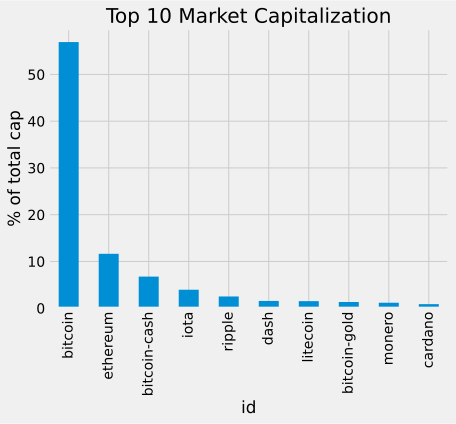

In [5]:
# Declaring these now for later use in the plots
Top_Cap_Title = 'Top 10 Market Capitalization'
Top_Cap_YLabel = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.iloc[0:10].set_index('id')

# Calculating market_cap_percentage
cap10 = cap10.assign(market_cap_per=lambda x: (x["market_cap_usd"] / cap["market_cap_usd"].sum()) * 100)

# Plotting the barplot with the title defined above
ax = cap10.market_cap_per.plot.bar()
ax.set_title(Top_Cap_Title)

# Annotating the y axis with the label defined above
ax.set_ylabel(Top_Cap_YLabel)



# 4. Making plot easier to read and more informative

Text(0.5, 0, '')

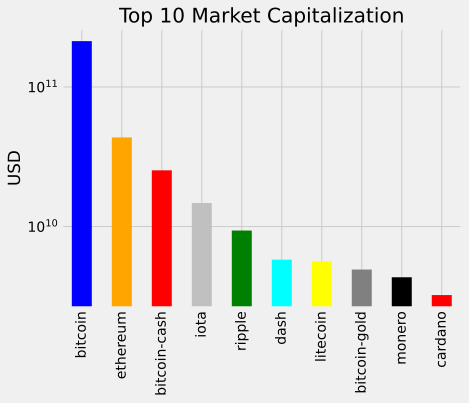

In [6]:
# Set colors for the bar plot

COLORS  = ['blue','orange','red','silver','green','cyan','yellow','grey','black','red']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_usd.plot.bar(color=COLORS, logy=True)
ax.set_title(Top_Cap_Title)

# Annotating the y-axis with 'USD'
ax.set_ylabel('USD')

# Removingthe xLable as it is not very informative
ax.set_xlabel("")

# 5. Volatility in cryptocurrencies

The cryptocurrencies market has been spectacularly voltile since the first exchange opened. Let's explore this volatility a bit more!

We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available

In [7]:
# Selecting id, percent_change_24h and percent_change_7d columns
volatility = coin17[['id','percent_change_24h','percent_change_7d']]

# dropping all NaN rows and setting the index to 'id'
volatility = volatility.dropna().set_index('id')

# Sorting the DataFrame by percent_change_24th in ascending order
volatility = volatility.sort_values('percent_change_24h',ascending =True)

# Checking the first few rows
print(volatility.head(7))

               percent_change_24h  percent_change_7d
id                                                  
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
coupecoin                  -93.93             -61.24
tyrocoin                   -79.02             -87.43
petrodollar                -76.55             542.96
bitok                      -74.37             -71.67
bankcoin                   -68.56              50.14


# 6. Bit Craziness

It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market


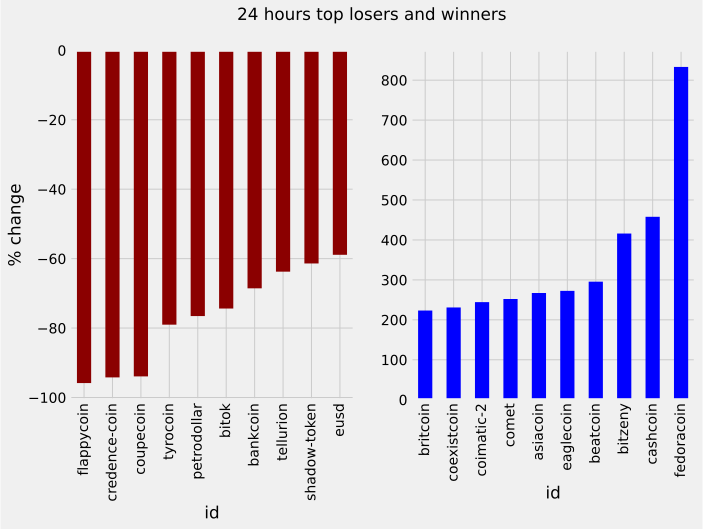

In [9]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(10,6))
    
    ax=(volatility_series[:10].plot.bar(color='darkred',ax = axes[0]))
    
    fig.suptitle(title)
    
    ax.set_ylabel('% change')
    
    ax = (volatility_series[-10:]).plot.bar(color='blue',ax=axes[1])
    
    return fig,ax

DTITLE = '24 hours top losers and winners'

fig,ax = top10_subplot(volatility.percent_change_24h, DTITLE)

# Let's check weekly series too

800% daily increase? Why are we doing this tutorial and not buying randon coins?

After calming down, let's reuse the function defined above to see what is going weekly instead of daily.


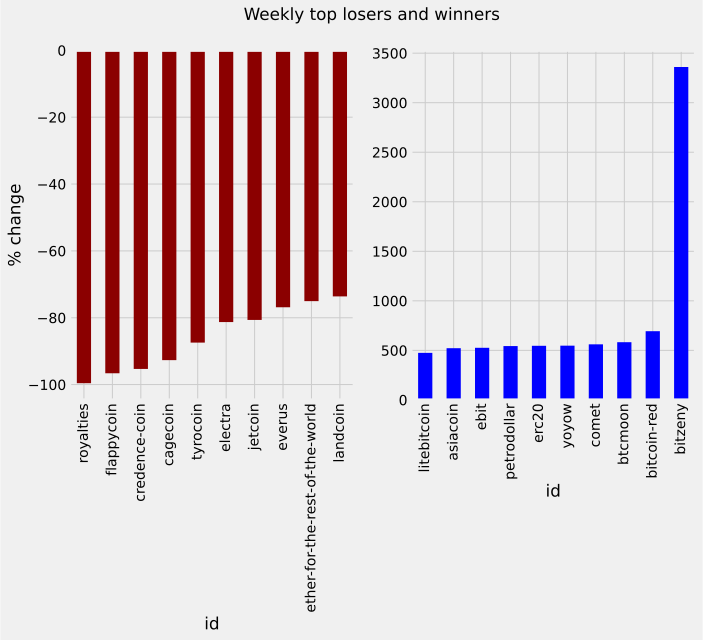

In [10]:
# Sorting in ascending order
volatility_7days = volatility.sort_values('percent_change_7d',ascending = True)

pTitle = 'Weekly top losers and winners'

fig,ax = top10_subplot(volatility_7days.percent_change_7d,pTitle)

# 8. How small is small?

The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones1

In [12]:
# Selecting everything bigger than 10 billion
largecaps = cap.query('market_cap_usd > 10000000000')

print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


# 9. Most coins are tiny

Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.


<BarContainer object of 3 artists>

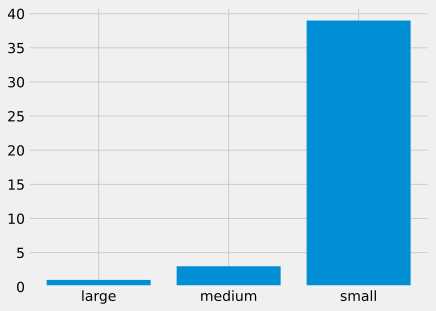

In [13]:
def capcount(query_string):
    return cap.query(query_string).count().id

Labels = ['large','medium','small']

# using capcount count the large cryptos
large = capcount('market_cap_usd > 100000000000')

medium = capcount('market_cap_usd > 20000000000')

small = capcount('market_cap_usd > 300000000')

values= [large, medium, small]

plt.bar(range(len(values)),values,tick_label=Labels)